In [24]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
from statistics import mean
import timeit

In [25]:
from gym.wrappers import Monitor

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [27]:
import math
import copy
from torch.distributions import Categorical
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [28]:
#Hyper-parameters
max_episodes = 1000          # max training episodes
max_timesteps = 250          # max timesteps in one episode
gamma = 0.01                # discount factor
gamma1 = 0.99
epsilon = 0.2                #need to change it to max(advantage)
dkl=1                       #need to change it to KL divergence between old and new policies
Q_r=[]
Q_r1=[]
a=[]
Q=np.zeros((max_timesteps,2))
mutation_power = 0.02#hyper-parameter, set from https://arxiv.org/pdf/1712.06567.pdf
#print(Q)

In [29]:
class CartPoleAI(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc = nn.Sequential(
                        nn.Linear(4,128, bias=True),
                        nn.ReLU(),
                        nn.Linear(128,2, bias=True),
                        nn.Softmax(dim=1)
                        )

                
        def forward(self, inputs):
            x = self.fc(inputs)
            return x

In [30]:
def init_weights(m):
    
        # nn.Conv2d weights are of shape [16, 1, 3, 3] i.e. # number of filters, 1, stride, stride
        # nn.Conv2d bias is of shape [16] i.e. # number of filters
        
        # nn.Linear weights are of shape [32, 24336] i.e. # number of input features, number of output features
        # nn.Linear bias is of shape [32] i.e. # number of output features
        
        if ((type(m) == nn.Linear) | (type(m) == nn.Conv2d)):
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.00)

In [31]:
def behavioural_policy(agents):
    return agent

In [32]:
def KL_divergence(agent1,agent2):
    return KL

In [33]:
def return_random_agents(num_agents):
    
    agents = []
    for _ in range(num_agents):
        
        agent = CartPoleAI()
        
        for param in agent.parameters():
            param.requires_grad = False
            
        init_weights(agent)
        agents.append(agent)
        
        
    return agents

In [34]:
def run_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        a.clear()
        Q_r1.clear()
        Q_r.clear()
        for i in range(max_timesteps):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            #print(output_probabilities)
            Q[i][0]=output_probabilities[0]
            Q[i][1]=output_probabilities[1]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            a.append(action)
            new_observation, reward, done, info = env.step(action)
            r+=reward
            #r+=(gamma1**i)*reward
            Q_r.append(reward)
            observation = new_observation
            if(done):
                break

        #reward_agents.append(r)
        #reward_agents.append(s)
        #print("Non-discounted Reward:::",Q_r)
        #for rew in reversed(Q_r):
        #    if rew==Q_r[len(Q_r)-1]:
        #        d_r=0
        #    else:
        #        d_r=rew+gamma1*d_r
        #    Q_r1.insert(0,d_r)
        for i in range(len(Q_r)):
            d_r=0
            c=0
            for j in range(i+1,len(Q_r)):
                d_r+=(gamma1**c)*Q_r[j]
                c+=1
            Q_r1.append(d_r)
            
        reward_agents.append(r)
    #print("Exit")
    #Q=Q[~np.all(Q==0,axis=1)]
    #print("Reward:::",reward_agents)
    #print("Probabilities:::",Q)
    #print("Actions:::",a)
    #for i in range()
    #print("Discounted Reward,i.e,Q:::",Q_r1)
    
    
    return reward_agents

In [35]:
def run_target_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        s=0
        i=0
        #print("SIZE OF ACTIONS:",len(a),"SIZE OF PROBABILITIES:",Q.shape,"SIZE OF DISCOUNTED REWARDS:",len(Q_r1))
        for i in range(len(Q_r1)):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            L_pi=(output_probabilities[a[i]]/Q[i][a[i]])*Q_r1[i]
            #print("Ratios :",output_probabilities[a[i]]/Q[i][a[i]])
            #print("Q value:",Q_r1[i])
            #print("L_pi",L_pi)
            #surr1= L_pi-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
            
            #print(output_probabilities)
            s+=L_pi
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env.step(action)
            #r+=(gamma**i)*reward
            
            #s=s+1
            observation = new_observation

            if(done):
                break
        #print("S:",s)
        #print("Max Q_r1:",max(Q_r1))
        #surr1= s-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
        #print("Surr1:",surr1)
        #reward_agents.append(surr1)        
        reward_agents.append(s)
    #print("Exit")
    #print("REWARD AGENTS",reward_agents)
    #print(reward_agents)
    return reward_agents

In [36]:
def alternate_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_target_agents([agent])[0]
    return score/runs

In [37]:
def return_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_agents([agent])[0]
    return score/runs

In [38]:
def run_agents_n_times(agents, runs):
    avg_score = []
    index = 0
    for agent in agents:
        if index%2==0:
            avg_score.append(return_average_score(agent,runs))
        else:
            avg_score.append(alternate_average_score(agent,runs))
        index+=1
    return avg_score

In [39]:
def mutate(agent):

    child_agent = copy.deepcopy(agent)
            
    for param in child_agent.parameters():
    
        if(len(param.shape)==4): #weights of Conv2D

            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    for i2 in range(param.shape[2]):
                        for i3 in range(param.shape[3]):
                            
                            param[i0][i1][i2][i3]+= mutation_power * np.random.rand()
                                
                                    

        elif(len(param.shape)==2): #weights of linear layer
            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    
                    param[i0][i1]+= mutation_power * np.random.randn()
                        

        elif(len(param.shape)==1): #biases of linear layer or conv layer
            for i0 in range(param.shape[0]):
                
                param[i0]+=mutation_power * np.random.randn()

    return child_agent

In [40]:
def return_children(agents, sorted_parent_indexes, elite_index):
    
    children_agents = []
    
    #first take selected parents from sorted_parent_indexes and generate N-1 children
    for i in range(len(agents)-1):
        
        selected_agent_index = sorted_parent_indexes[np.random.randint(len(sorted_parent_indexes))]
        children_agents.append(mutate(agents[selected_agent_index]))

    #now add one elite
    elite_child = add_elite(agents, sorted_parent_indexes, elite_index)
    children_agents.append(elite_child)
    elite_index=len(children_agents)-1 #it is the last one
    
    return children_agents, elite_index

In [41]:
def add_elite(agents, sorted_parent_indexes, elite_index=None, only_consider_top_n=10):
    
    candidate_elite_index = sorted_parent_indexes[:only_consider_top_n]
    
    if(elite_index is not None):
        candidate_elite_index = np.append(candidate_elite_index,[elite_index])
        
    top_score = None
    top_elite_index = None
    
    for i in candidate_elite_index:
        score = return_average_score(agents[i],runs=5)
        print("Score for elite i ", i, " is ", score)
        
        if(top_score is None):
            top_score = score
            top_elite_index = i
        elif(score > top_score):
            top_score = score
            top_elite_index = i
            
    print("Elite selected with index ",top_elite_index, " and score", top_score)
    
    child_agent = copy.deepcopy(agents[top_elite_index])
    return child_agent

In [42]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [43]:
def run_agents_n_times_again(agents, runs):
    avg_score = []
    for agent in agents:
        avg_score.append(return_average_score(agent,runs))
    return avg_score



Generation  0  | Mean rewards:  103.47190852576846  | Mean of top 5:  625.101884487996
The minimum reward is earned is  16.97 by the  69 th agent
Top  10  scores [51 15 89 87 59 11 85 57 73 17]
Rewards for top:  [960.1611590297243, 701.3080922383534, 628.2781547573893, 478.88238653705315, 356.87962987745937, 351.8860511966278, 320.13008728982504, 314.8043901446899, 266.3537663204445, 254.70755910536286]
Score for elite i  51  is  18.6
Score for elite i  15  is  17.8
Score for elite i  89  is  14.8
Score for elite i  87  is  27.6
Score for elite i  59  is  20.0
Score for elite i  11  is  27.4
Score for elite i  85  is  15.2
Score for elite i  57  is  19.6
Score for elite i  73  is  15.4
Score for elite i  17  is  29.0
Elite selected with index  17  and score 29.0


Generation  1  | Mean rewards:  122.94326026444942  | Mean of top 5:  781.5277836794506
The minimum reward is earned is  18.4 by the  27 th agent
Top  10  scores [ 3 37 67 15 17 51 83 45  5 71]
Rewards for top:  [985.774088

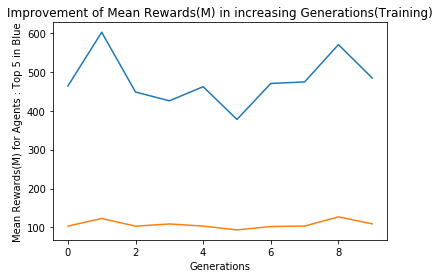

Eta_pi : [22.49, 20.24, 24.25, 20.06, 18.82, 23.09, 21.27, 17.96, 18.73, 22.06, 19.07, 20.29, 20.18, 23.06, 21.17, 21.44, 23.13, 20.6, 17.19, 21.02, 19.46, 22.16, 22.25, 21.47, 21.3, 24.59, 18.45, 19.29, 18.61, 21.35, 20.31, 17.67, 18.52, 20.73, 23.91, 25.31, 22.33, 22.17, 21.35, 22.24, 23.64, 25.84, 25.02, 25.1, 19.63, 20.64, 21.67, 21.0, 19.49, 17.15, 21.45, 17.84, 19.58, 20.91, 21.68, 21.86, 19.64, 19.34, 19.59, 23.98, 21.89, 20.34, 24.64, 20.14, 22.96, 25.17, 23.23, 18.69, 22.37, 23.77, 17.03, 19.42, 21.42, 22.73, 19.52, 17.67, 16.74, 21.19, 21.67, 23.46, 18.19, 22.65, 18.51, 21.69, 20.77, 20.45, 22.09, 19.81, 25.3, 20.78, 21.21, 23.42, 22.87, 18.56, 24.16, 21.86, 21.06, 24.02, 20.34, 23.65]
 
Corresponding L_pi1 values : [22.44, 313.64453689012413, 24.45, 53.876161643754315, 19.46, 87.06075298341737, 20.48, 137.6643276747985, 17.35, 137.73033335330362, 19.76, 42.94147261423055, 19.82, 57.620764666145654, 24.99, 475.99583526961806, 23.65, 112.89302023210777, 17.59, 24.5305638915558

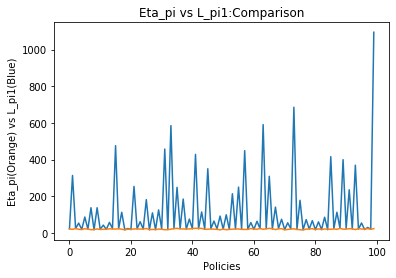

In [44]:
game_actions = 2 #2 actions possible: left or right
start = timeit.default_timer()
#disable gradients as we will not use them
torch.set_grad_enabled(False)

# initialize N number of agents
num_agents = 100
agents = return_random_agents(num_agents)

# How many top agents to consider as parents
top_limit = 10

# run evolution until X generations
generations = 10

elite_index = None
n=[]
m=[]

for generation in range(generations):

    # return rewards of agents
    rewards = run_agents_n_times(agents, 100) #return average of multiple runs
    #print(rewards)
    #sort by rewards
    sorted_parent_indexes = np.argsort(rewards)[::-1][:top_limit] #reverses and gives top values (argsort sorts by ascending by default) https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
    print("")
    print("")
    top_rewards = []
    
    for best_parent in sorted_parent_indexes:
        top_rewards.append(rewards[best_parent])
    
    print("Generation ", generation, " | Mean rewards: ", np.mean(rewards), " | Mean of top 5: ",np.mean(top_rewards[:5]))
    #print(rewards)
    print("The minimum reward is earned is ",min(rewards),"by the ",rewards.index(min(rewards))+1,"th agent")
    print("Top ",top_limit," scores", sorted_parent_indexes)
    print("Rewards for top: ",top_rewards)
    
    m.append(np.mean(top_rewards))
    n.append(np.mean(rewards))
    # setup an empty list for containing children agents
    children_agents, elite_index = return_children(agents, sorted_parent_indexes, elite_index)

    # kill all agents, and replace them with their children
    agents = children_agents
stop = timeit.default_timer()
print('Time: ', stop - start)  
x=np.arange(generations)
plt.plot(x,m)
plt.plot(x,n)
plt.title('Improvement of Mean Rewards(M) in increasing Generations(Training)')
plt.ylabel('Mean Rewards(M) for Agents : Top 5 in Blue')
plt.xlabel('Generations')
plt.show()

#plotting for final generation eta_pi vs l_pi1(pi)
rewards1 = run_agents_n_times(agents, 100) #return average of multiple runs
rewards2 = run_agents_n_times_again(agents,100)

print("Eta_pi :",rewards2)
print(" ")
print("Corresponding L_pi1 values :",rewards1)
print(" ")
sorted_parent_indexes1 = np.argsort(rewards1)[::-1][:top_limit]
sorted_parent_indexes2 = np.argsort(rewards2)[::-1][:top_limit]
print("Top ",top_limit," policies according to L_pi1 estimate are :",sorted_parent_indexes1)
print("Top ",top_limit," policies according to Eta_pi estimate are :",sorted_parent_indexes2)
print(" ")
xpoints = np.arange(100)
plt.plot(xpoints,rewards1)
plt.plot(xpoints,rewards2)
plt.title('Eta_pi vs L_pi1:Comparison')
plt.xlabel('Policies')
plt.ylabel('Eta_pi(Orange) vs L_pi1(Blue)')
plt.show()

In [45]:
def play_agent(agent):
        env = gym.make("CartPole-v0")
        
        env_record = Monitor(env, './video', force=True)
        observation = env_record.reset()
        last_observation = observation
        r=0
        j=[]
        episode_durations=[]
        timestep=0
        for timestep in range(1000):
            env_record.render()
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env_record.step(action)
            r=r+reward
            j.append(r)
            observation = new_observation

            if(done):
                break

        env_record.close()

        print("Total Collected Rewards: ",r)

In [46]:
play_agent(agents[0])

Total Collected Rewards:  20.0
